In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

#sns.set_theme()

In [2]:
a = 12
N = 1000

theta = np.zeros(N)
theta[:int(N/4)] = np.linspace(0, np.pi / 2, int(N/4))
theta[int(N/4):2*int(N/4)] = np.linspace(np.pi / 2, 0, int(N/4))
theta[2*int(N/4):3*int(N/4)] = np.linspace(0, np.pi / 2, int(N/4))
theta[3*int(N/4):] = np.linspace(np.pi / 2, 0, int(N/4))

x = np.zeros(N)
y = np.zeros(N)

1 1.999960203981911
4 4.0


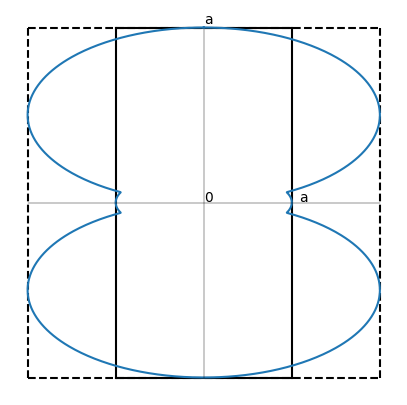

In [10]:
wa = 1
wb = 4
proportion = wb / wa
alpha = np.arctan(proportion)

for i in range(N):
    theta_i = theta[i]
    
    rho = wa * a * np.sin(theta_i)
    if theta_i < alpha:
        rho = wb * a * np.cos(theta_i)
    
    if i < N/4:
        x[i] = rho * np.cos(theta_i)
        y[i] = rho * np.sin(theta_i)
        continue
    if i < N/2:
        x[i] = - rho * np.cos(theta_i)
        y[i] = rho * np.sin(theta_i)
        continue
    if i < 3*N/4:
        x[i] = - rho * np.cos(theta_i)
        y[i] = - rho * np.sin(theta_i)
        continue
    x[i] = rho * np.cos(theta_i)
    y[i] = - rho * np.sin(theta_i)
    

fig = plt.figure(figsize=(5, 5))

xmax = np.max(x)
ymax = np.max(y)

plt.plot([ymax, ymax], [-xmax, xmax], '--k')
plt.plot([-ymax, -ymax], [-xmax, xmax], '--k')
plt.plot([-ymax, ymax], [-xmax, -xmax], '--k')
plt.plot([-ymax, ymax], [xmax, xmax], '--k')

plt.plot([wa*a, wa*a], [-wb*a, wb*a], 'k')
plt.plot([-wa*a, -wa*a], [-wb*a, wb*a], 'k')
plt.plot([-wa*a, wa*a], [-wb*a, -wb*a], 'k')
plt.plot([-wa*a, wa*a], [wb*a, wb*a], 'k')

plt.plot(y, x)

plt.plot([0, 0], [-xmax, xmax], 'k', linewidth=0.3)
plt.plot([-ymax, ymax], [0, 0], 'k', linewidth=0.3)

plt.axis('off')

plt.text(0, 0, '0')

delta = 1
print(wa, ymax/a)
plt.text(wa*a+delta, 0, 'a')
#plt.text(ymax+delta, 0, '3a/2')

print(wb, xmax/a)
plt.text(0, wb*a+delta, f'a')
#plt.text(0, xmax+delta, f'{int(xmax/a)}a')

plt.savefig(f'{wa}_{wb}.eps')

In [12]:
from shapely.geometry import Polygon

aux = []
for i in range(len(x)):
    aux.append((x[i], y[i]))

polygon = Polygon(tuple(aux))

square2 = 4 * xmax * ymax
square2, polygon.area / square2

(4607.908309974323, 0.7955638495771664)